[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel


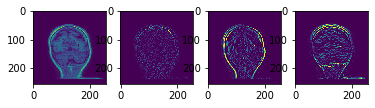

In [15]:
# import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]
	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")
    
	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()
			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k
            
	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")
	# return the output image
	return output

# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# args = vars(ap.parse_args())

# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
# construct a sharpening filter
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
# 	("small_blur", smallBlur),
# 	("large_blur", largeBlur),
# 	("sharpen", sharpen),
	("laplacian", laplacian),
	("sobel_x", sobelX),
	("sobel_y", sobelY)
)

i = 2

# load the input image and convert it to grayscale
# image = cv2.imread(args["image"])
image = cv2.imread('/home/lingfeng/Desktop/Nested_CV/thesis_plots_drawing/coronal_images/6/6cor_1/6cor_1_114_1.jpg')
# image = cv2.imread('airplane4.png')
# image = cv2.imread('airplane4.png')
image = cv2.resize(image, (256,256))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# loop over the kernels

plt.subplot(1,4,1)
plt.imshow(gray)
    
for (kernelName, kernel) in kernelBank:
	# apply the kernel to the grayscale image using both
	# our custom `convole` function and OpenCV's `filter2D`
	# function
	print("[INFO] applying {} kernel".format(kernelName))
	convoleOutput = convolve(gray, kernel)
	opencvOutput = cv2.filter2D(gray, -1, kernel)
# 	print(opencvOutput)
	plt.subplot(1,4,i)
	plt.imshow(opencvOutput)
	i += 1

plt.show()
# 	# show the output images
# 	cv2.imshow("original", gray)
# 	cv2.imshow("{} - convole".format(kernelName), convoleOutput)
# 	cv2.imshow("{} - opencv".format(kernelName), opencvOutput)
# 	cv2.waitKey(0)
# 	cv2.destroyAllWindows()

[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel


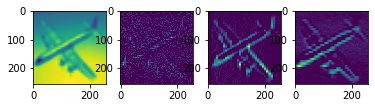

In [16]:
i = 2

# load the input image and convert it to grayscale
# image = cv2.imread(args["image"])
# image = cv2.imread('/home/lingfeng/Desktop/Nested_CV/thesis_plots_drawing/coronal_images/6/6cor_1/6cor_1_114_1.jpg')
# image = cv2.imread('airplane4.png')
image = cv2.imread('airplane4.png')
image = cv2.resize(image, (256,256))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# loop over the kernels

plt.subplot(1,4,1)
plt.imshow(gray)
    
for (kernelName, kernel) in kernelBank:
	# apply the kernel to the grayscale image using both
	# our custom `convole` function and OpenCV's `filter2D`
	# function
	print("[INFO] applying {} kernel".format(kernelName))
	convoleOutput = convolve(gray, kernel)
	opencvOutput = cv2.filter2D(gray, -1, kernel)
# 	print(opencvOutput)
	plt.subplot(1,4,i)
	plt.imshow(opencvOutput)
	i += 1

plt.show()
# 	# show the output images
# 	cv2.imshow("original", gray)
# 	cv2.imshow("{} - convole".format(kernelName), convoleOutput)
# 	cv2.imshow("{} - opencv".format(kernelName), opencvOutput)
# 	cv2.waitKey(0)
# 	cv2.destroyAllWindows()